In [1]:
# Importa los módulos necesarios

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Carga la matriz que hemos calculado con C

# Flujo con C
psi = np.loadtxt("psitau.dat")

# Malla con C
XX = np.loadtxt("xxtau.dat") 
YY = np.loadtxt("yytau.dat")

In [3]:
# Comprueba las dimensiones en la malla
print psi.shape
print XX.shape
print YY.shape

(50, 50)
(50, 50)
(50, 50)


In [83]:
# Datos

x0 = 0.2
y0 = 0.3 

a = 1
b = -0.770795717840213
beta = 3.383863361824123

alpha = 0

U = 1

In [4]:
N_malla = 50   #nº de puntos en cada dimensión

x_max = 3
y_max = 3

In [85]:
# Circulación que hay que añadir al cilindro para
# que se cumpla la hipótesis de Kutta en el perfil

T = 4 * np.pi * a * U * np.sin(alpha) 


In [86]:
rho = np.sqrt(np.power((XX-x0),2)+np.power((YY-y0),2))
theta = np.arctan((YY-y0)/(XX-x0))

psi = (rho * np.sin(theta-alpha) - np.sin(theta-alpha)/rho) * U + (np.log(abs(rho))*T)/(2*np.pi) 

/Users/pablordrrbl/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from IPython.kernel.zmq import kernelapp as app


In [87]:
# Transformación para la malla de C

xx = XX * (1+(np.power(a,2)/(np.power(XX,2)+np.power(YY,2))))
yy = YY * (1-(np.power(a,2)/(np.power(XX,2)+np.power(YY,2))))

/Users/pablordrrbl/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()
/Users/pablordrrbl/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/Users/pablordrrbl/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/Users/pablordrrbl/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in multiply


(-3, 3)

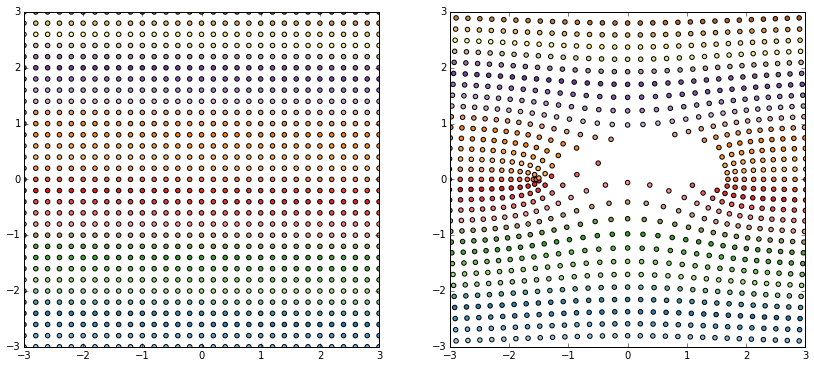

In [88]:
#pintamos la malla para ver como se ha transformado
plt.figure("malla", figsize=(14,6))
plt.subplot(1,2,1)

plt.scatter(XX.flatten(), YY.flatten(),\
              cmap=plt.cm.Paired, c=np.linspace(0,1, N_malla**2))

plt.xlim(-x_max,x_max)
plt.ylim(-y_max,y_max)

plt.subplot(1,2,2)

plt.scatter(xx_c.flatten(), yy_c.flatten(),\
              cmap=plt.cm.Paired, c=np.linspace(0,1, N_malla**2))

plt.xlim(-x_max,x_max)
plt.ylim(-y_max,y_max)

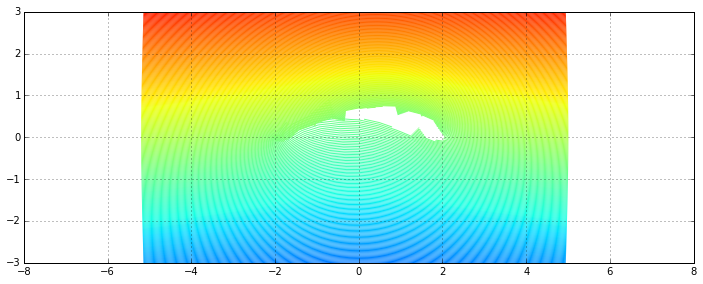

In [8]:

plt.figure("flujo perfil", figsize=(12,12))

plt.contour(XX, YY, psi, np.linspace(-5,5,440))

plt.xlim(-8,8)
plt.ylim(-3,3)
plt.grid()
plt.gca().set_aspect(1)



In [90]:
for i in range(0, 31):
    for j in range(0, 31):
        if (np.sqrt((XX[i][j] - x0)**2 + (YY[i][j] - y0)**2) < 0.95*a):
            XX[i][j] = 0
            YY[i][j] = 0
        

In [91]:
# Transformación de Yukovski


xx = XX * (1+(np.power(a,2)/(np.power(XX,2)+np.power(YY,2))))
yy = YY * (1-(np.power(a,2)/(np.power(XX,2)+np.power(YY,2))))

/Users/pablordrrbl/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/Users/pablordrrbl/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in multiply
/Users/pablordrrbl/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide
/Users/pablordrrbl/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in multiply


(-3, 3)

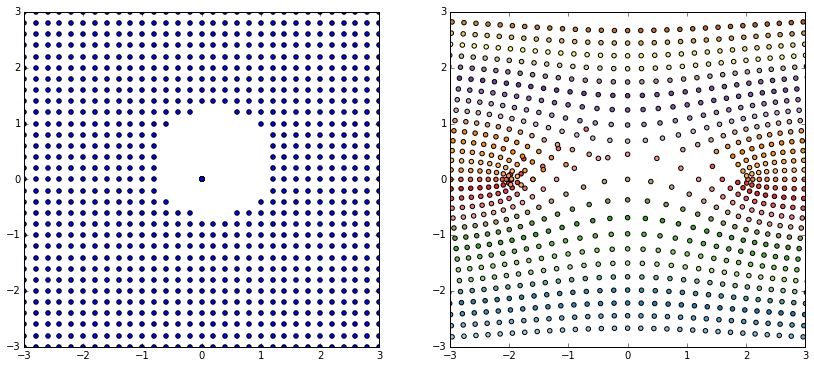

In [92]:
#pintamos la malla para ver como se ha transformado
plt.figure("malla", figsize=(14,6))
plt.subplot(1,2,1)

plt.scatter(XX.flatten(), YY.flatten())

plt.xlim(-x_max,x_max)
plt.ylim(-y_max,y_max)

plt.subplot(1,2,2)

plt.scatter(xx.flatten(), yy.flatten(),\
              cmap=plt.cm.Paired, c=np.linspace(0,1, N_malla**2))

plt.xlim(-x_max,x_max)
plt.ylim(-y_max,y_max)

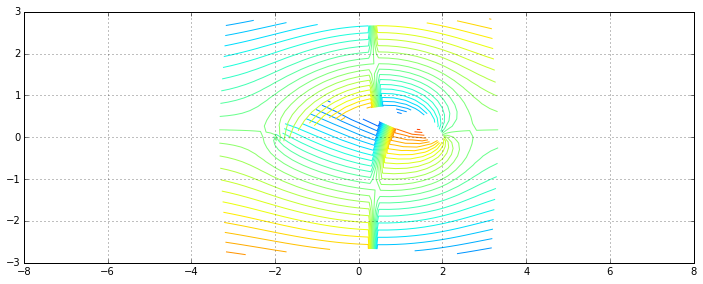

In [93]:

plt.figure("flujo perfil", figsize=(12,12))

plt.contour(xx, yy, psii, np.linspace(-5,5,45))

plt.xlim(-8,8)
plt.ylim(-3,3)
plt.grid()
plt.gca().set_aspect(1)

